# Prediction of SET Index Sentiment from News 
Classes:
- positive/1, 
- slightly positive/0+, 

- neutral/0, 

- slightly negative/0- 
- negative/-1.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

downloaded some packages and modules:
- pythainlp.sentiment (manually parsed the modules)
- plt.style.use('ggplot')
- nltk.download('punkt')
- nltk.download('maxent_ne_chunker')
- nltk.download('vader_lexicon')

In [102]:
pip install pythainlp

Note: you may need to restart the kernel to use updated packages.


In [161]:
df = pd.read_csv('data.csv')

In [162]:
df.head()

,link,paragraph_info,title,Pat
0,https://www.trisrating.com/th/rating-news/180-...,ทริสเรทติ้งคงอันดับเครดิตองค์กรของ บริษัท ปริญ...,ทริสเรทติ้งจัดอันดับเครดิตหุ้นกู้ไม่ด้อยสิทธิ ...,0
1,https://www.trisrating.com/th/rating-news/180-...,อันดับเครดิตสะท้อนถึงฐานรายได้ของบริษัทที่มีขน...,ทริสเรทติ้งจัดอันดับเครดิตหุ้นกู้ไม่ด้อยสิทธิ ...,0-
2,https://www.trisrating.com/th/rating-news/180-...,อันดับเครดิตของหุ้นกู้มีประกันของบริษัทเพิ่มขึ...,ทริสเรทติ้งจัดอันดับเครดิตหุ้นกู้ไม่ด้อยสิทธิ ...,0
3,https://www.trisrating.com/th/rating-news/180-...,12% ในช่วงไตรมาสแรกของปี 2563 รายได้ของบริษัทอ...,ทริสเรทติ้งจัดอันดับเครดิตหุ้นกู้ไม่ด้อยสิทธิ ...,0
4,https://www.trisrating.com/th/rating-news/180-...,ภายใต้สมมติฐานของทริสเรทติ้ง คาดว่ารายได้ของบร...,ทริสเรทติ้งจัดอันดับเครดิตหุ้นกู้ไม่ด้อยสิทธิ ...,0+


In [163]:
df.shape

(400, 4)

In [164]:
df.drop(['link'], axis=1)

,paragraph_info,title,Pat
0,ทริสเรทติ้งคงอันดับเครดิตองค์กรของ บริษัท ปริญ...,ทริสเรทติ้งจัดอันดับเครดิตหุ้นกู้ไม่ด้อยสิทธิ ...,0
1,อันดับเครดิตสะท้อนถึงฐานรายได้ของบริษัทที่มีขน...,ทริสเรทติ้งจัดอันดับเครดิตหุ้นกู้ไม่ด้อยสิทธิ ...,0-
2,อันดับเครดิตของหุ้นกู้มีประกันของบริษัทเพิ่มขึ...,ทริสเรทติ้งจัดอันดับเครดิตหุ้นกู้ไม่ด้อยสิทธิ ...,0
3,12% ในช่วงไตรมาสแรกของปี 2563 รายได้ของบริษัทอ...,ทริสเรทติ้งจัดอันดับเครดิตหุ้นกู้ไม่ด้อยสิทธิ ...,0
4,ภายใต้สมมติฐานของทริสเรทติ้ง คาดว่ารายได้ของบร...,ทริสเรทติ้งจัดอันดับเครดิตหุ้นกู้ไม่ด้อยสิทธิ ...,0+
...,...,...,...
395,ในด้านส่วนแบ่งทางการตลาดเมื่อพิจารณาจากรายได้แ...,ทริสเรทติ้งคงอันดับเครดิตองค์กร & หุ้นกู้ไม่ด้...,0+
396,ในช่วง 3 ปีข้างหน้าทริสเรทติ้งคาดว่ารายได้จากก...,ทริสเรทติ้งคงอันดับเครดิตองค์กร & หุ้นกู้ไม่ด้...,0+
397,ทริสเรทติ้งมองว่าบริษัททรู คอร์ปอเรชั่น มีจําน...,ทริสเรทติ้งคงอันดับเครดิตองค์กร & หุ้นกู้ไม่ด้...,0
398,นอกจากนี้ ในเดือนกุมภาพันธ์ 2563 บริษัททรู มูฟ...,ทริสเรทติ้งคงอันดับเครดิตองค์กร & หุ้นกู้ไม่ด้...,1


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   link            400 non-null    object
 1   paragraph_info  400 non-null    object
 2   title           400 non-null    object
 3   Pat             400 non-null    object
dtypes: object(4)
memory usage: 12.6+ KB


In [166]:
df.isnull().sum()

link              0
paragraph_info    0
title             0
Pat               0
dtype: int64

There are no missing or null values

# 1. EDA

In [167]:
df['Pat']

0       0
1      0-
2       0
3       0
4      0+
       ..
395    0+
396    0+
397     0
398     1
399    0+
Name: Pat, Length: 400, dtype: object

In [168]:
df['Pat'].value_counts()

0       197
0+       65
-1       64
0-       51
1        22
0--1      1
Name: Pat, dtype: int64

There is a row with unusual Pat score, I dropped it. 

In [172]:
df=df.drop(labels=[368], axis=0)

In [177]:
df.shape

(399, 4)

<AxesSubplot:title={'center':'Count of Reviews by Tris Rating'}>

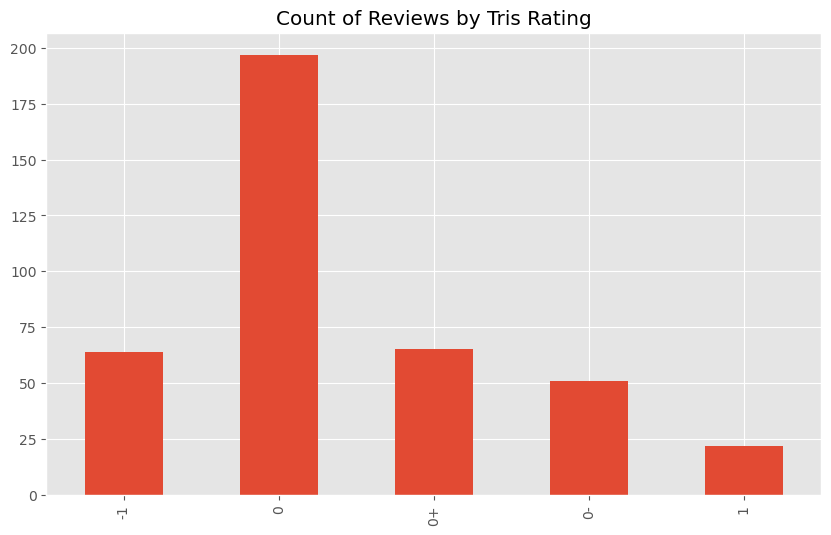

In [182]:
df['Pat'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Tris Rating', figsize=(10,6))

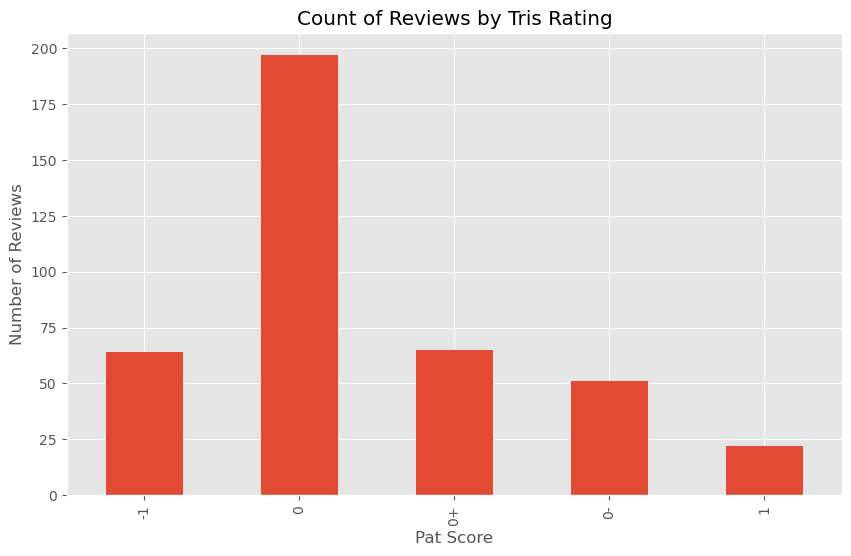

In [183]:
ax = df['Pat'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Tris Rating', figsize=(10,6))
ax.set_xlabel('Pat Score')
ax.set_ylabel('Number of Reviews')
plt.show()

# Observations : 
# most comments are neutral (0), slightly positive (0+) and negative (-1)
Recall the classes
- positive/1, 
- slightly positive/0+, 
- neutral/0,
- slightly negative/0-, or 
- negative/-1

# 2. PyThaiNLP (along NLTK)

For tokenization and POS tagging, I used both NLTK and PyThaiNLP to cross-check. It works fine.

In [184]:
example = df['paragraph_info'][1]
print(example)

อันดับเครดิตสะท้อนถึงฐานรายได้ของบริษัทที่มีขนาดเล็ก ภาระหนี้ระดับปานกลาง และ ความสามารถในการทํากําไรที่อยู่ในระดับที่ยอมรับได้ อันดับเครดิตยังคํานึงถึงวัฏจักรของธุรกิจ อสังหาริมทรัพย์เพื่ออยู่อาศัยและความต้องการที่อยู่อาศัยที่ชะลอตัวอันเนื่องมาจากผลกระทบทาง เศรษฐกิจจากการแพร่ระบาดของไวรัสโควิด-19 ซึ่งเพิ่มความกดดันต่อเศรษฐกิจที่อ่อนแออยู่แล้ว


In [185]:
nltk.word_tokenize(example)

['อันดับเครดิตสะท้อนถึงฐานรายได้ของบริษัทที่มีขนาดเล็ก',
 'ภาระหนี้ระดับปานกลาง',
 'และ',
 'ความสามารถในการทํากําไรที่อยู่ในระดับที่ยอมรับได้',
 'อันดับเครดิตยังคํานึงถึงวัฏจักรของธุรกิจ',
 'อสังหาริมทรัพย์เพื่ออยู่อาศัยและความต้องการที่อยู่อาศัยที่ชะลอตัวอันเนื่องมาจากผลกระทบทาง',
 'เศรษฐกิจจากการแพร่ระบาดของไวรัสโควิด-19',
 'ซึ่งเพิ่มความกดดันต่อเศรษฐกิจที่อ่อนแออยู่แล้ว']

The rating reflects the company's small revenue base. Moderate leverage and acceptable profitability The rating also takes into consideration the business cycle. Residential real estate and housing demand slowdown due to economic impact economy from the spread of the COVID-19 virus That adds to the pressure on an already weak economy. Below I tried the same thing using PyThaiNlp the package available for processing Thai Language instead of NLTK.

In [187]:
import pythainlp
pythainlp.word_tokenize(example)

['อันดับ',
 'เครดิต',
 'สะท้อน',
 'ถึง',
 'ฐาน',
 'รายได้',
 'ของ',
 'บริษัท',
 'ที่',
 'มี',
 'ขนาดเล็ก',
 ' ',
 'ภาระ',
 'หนี้',
 'ระดับปานกลาง',
 ' ',
 'และ',
 ' ',
 'ความสามารถ',
 'ใน',
 'กา',
 'รท',
 'ํากํา',
 'ไร',
 'ที่อยู่',
 'ใน',
 'ระดับ',
 'ที่ยอมรับ',
 'ได้',
 ' ',
 'อันดับ',
 'เครดิต',
 'ยัง',
 'คํา',
 'นึง',
 'ถึง',
 'วัฏจักร',
 'ของ',
 'ธุรกิจ',
 ' ',
 'อสังหาริมทรัพย์',
 'เพื่อ',
 'อยู่อาศัย',
 'และ',
 'ความต้องการ',
 'ที่อยู่',
 'อาศัยที่',
 'ชะลอตัว',
 'อันเนื่องมาจาก',
 'ผลกระทบ',
 'ทาง',
 ' ',
 'เศรษฐกิจ',
 'จาก',
 'การ',
 'แพร่ระบาด',
 'ของ',
 'ไวรัส',
 'โควิด',
 '-',
 '19',
 ' ',
 'ซึ่ง',
 'เพิ่ม',
 'ความกดดัน',
 'ต่อ',
 'เศรษฐกิจ',
 'ที่',
 'อ่อนแอ',
 'อยู่แล้ว']

In [188]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['อันดับเครดิตสะท้อนถึงฐานรายได้ของบริษัทที่มีขนาดเล็ก',
 'ภาระหนี้ระดับปานกลาง',
 'และ',
 'ความสามารถในการทํากําไรที่อยู่ในระดับที่ยอมรับได้',
 'อันดับเครดิตยังคํานึงถึงวัฏจักรของธุรกิจ',
 'อสังหาริมทรัพย์เพื่ออยู่อาศัยและความต้องการที่อยู่อาศัยที่ชะลอตัวอันเนื่องมาจากผลกระทบทาง',
 'เศรษฐกิจจากการแพร่ระบาดของไวรัสโควิด-19',
 'ซึ่งเพิ่มความกดดันต่อเศรษฐกิจที่อ่อนแออยู่แล้ว']

In [189]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


[('อันดับเครดิตสะท้อนถึงฐานรายได้ของบริษัทที่มีขนาดเล็ก', 'JJ'),
 ('ภาระหนี้ระดับปานกลาง', 'NNP'),
 ('และ', 'NNP'),
 ('ความสามารถในการทํากําไรที่อยู่ในระดับที่ยอมรับได้', 'NNP'),
 ('อันดับเครดิตยังคํานึงถึงวัฏจักรของธุรกิจ', 'NNP'),
 ('อสังหาริมทรัพย์เพื่ออยู่อาศัยและความต้องการที่อยู่อาศัยที่ชะลอตัวอันเนื่องมาจากผลกระทบทาง',
  'NNP'),
 ('เศรษฐกิจจากการแพร่ระบาดของไวรัสโควิด-19', 'JJ'),
 ('ซึ่งเพิ่มความกดดันต่อเศรษฐกิจที่อ่อนแออยู่แล้ว', 'NN')]

In [190]:
#let us try the same using "Py Thai NLP" package, it works as same. So going forward we can either use NLTK or PyThaiNLP instead.
# One drawback about PyThaiNLP is that it is compatible to only Thai Language as compared to NLTK
import pythainlp
nltk.pos_tag(tokens)

[('อันดับเครดิตสะท้อนถึงฐานรายได้ของบริษัทที่มีขนาดเล็ก', 'JJ'),
 ('ภาระหนี้ระดับปานกลาง', 'NNP'),
 ('และ', 'NNP'),
 ('ความสามารถในการทํากําไรที่อยู่ในระดับที่ยอมรับได้', 'NNP'),
 ('อันดับเครดิตยังคํานึงถึงวัฏจักรของธุรกิจ', 'NNP'),
 ('อสังหาริมทรัพย์เพื่ออยู่อาศัยและความต้องการที่อยู่อาศัยที่ชะลอตัวอันเนื่องมาจากผลกระทบทาง',
  'NNP'),
 ('เศรษฐกิจจากการแพร่ระบาดของไวรัสโควิด-19', 'JJ'),
 ('ซึ่งเพิ่มความกดดันต่อเศรษฐกิจที่อ่อนแออยู่แล้ว', 'NN')]

each token with parts of the speech, detail tagging can be found at https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging ;
for example, in the above tokens, ภาระหนี้ระดับปานกลาง (Moderate Debt Load) which is labelled 'NNP' that is proper noun, singular.

In [191]:
tagged = nltk.pos_tag(tokens)
tagged[:5]

[('อันดับเครดิตสะท้อนถึงฐานรายได้ของบริษัทที่มีขนาดเล็ก', 'JJ'),
 ('ภาระหนี้ระดับปานกลาง', 'NNP'),
 ('และ', 'NNP'),
 ('ความสามารถในการทํากําไรที่อยู่ในระดับที่ยอมรับได้', 'NNP'),
 ('อันดับเครดิตยังคํานึงถึงวัฏจักรของธุรกิจ', 'NNP')]

In [192]:
import nltk
nltk.download('maxent_ne_chunker')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  อันดับเครดิตสะท้อนถึงฐานรายได้ของบริษัทที่มีขนาดเล็ก/JJ
  ภาระหนี้ระดับปานกลาง/NNP
  และ/NNP
  ความสามารถในการทํากําไรที่อยู่ในระดับที่ยอมรับได้/NNP
  อันดับเครดิตยังคํานึงถึงวัฏจักรของธุรกิจ/NNP
  อสังหาริมทรัพย์เพื่ออยู่อาศัยและความต้องการที่อยู่อาศัยที่ชะลอตัวอันเนื่องมาจากผลกระทบทาง/NNP
  เศรษฐกิจจากการแพร่ระบาดของไวรัสโควิด-19/JJ
  ซึ่งเพิ่มความกดดันต่อเศรษฐกิจที่อ่อนแออยู่แล้ว/NN)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


This chunks this into a sentence and along the specific parts of speech. I had to download the module named maxnet_ne_chunker

# 3. Sentiment Scoring

I used NLTK for VADER and for sentiment analysis. Worked as expected as the sentiment scores suggest below.

In [193]:
import pythainlp
from pythainlp import sentiment

At this point, I just solved a big trouble that I encountered while sentiment analysis using PyThaiNLP, the package does not contain a 'sentiment analyzer' tool, hence I had to manually create a module and called as above.

In [194]:
sentiment_in_ana.polarity_scores('ฉันอารมณ์เสีย')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [119]:
# Valence Aware Dictionary and Sentiment Reasoner, which is a bag of words appraoch in sentiment analysis

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sentiment_in_ana = SentimentIntensityAnalyzer()
sentiment_in_ana

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [195]:
sentiment_in_ana.polarity_scores('I am upset')

{'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3818}

In [196]:
sentiment_in_ana.polarity_scores('This was the most troublesome experience ever')

{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.5563}

Sentiment score followed by the words in a sentence works, however, in PyThaiNLP this module is not saturated for all Thai words.

# 4. Feature Engineering

In [207]:
#let's recall the data counts, I am keeping the code as I am doing
df['Pat'].value_counts()

0     197
0+     65
-1     64
0-     51
1      22
Name: Pat, dtype: int64

In [226]:
# X as a feature and y as a Label
X = df.drop(['Pat'], axis=1)  
y = df["Pat"]

In [227]:
y.value_counts()/len(df)*100

0     49.373434
0+    16.290727
-1    16.040100
0-    12.781955
1      5.513784
Name: Pat, dtype: float64

In [228]:
#imbalanced learn comes along the package scikit learn, checked using pip install, 
#if not installed, use pip to install it using pip install imblearn

from imblearn.over_sampling import RandomOverSampler
under_sampler = RandomOverSampler(random_state = 42)
X, y = under_sampler.fit_resample(X, y)

In [229]:
y.value_counts()/len(y)*100

0     20.0
0-    20.0
0+    20.0
-1    20.0
1     20.0
Name: Pat, dtype: float64

In [236]:
# TfidfVectorizer helps to count the most frequently used words
# tokenize helps to split sentences to words that is used earlier
# we are gonna count using vector to build the model

from sklearn.feature_extraction.text import TfidfVectorizer
from pythainlp.tokenize import word_tokenize

tfidf = TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1,2), min_df=20, sublinear_tf=True)
X_vector = tfidf.fit_transform(X["paragraph_info"]).toarray()
print(X_vector)

[[0.10567079 0.05282261 0.         ... 0.16333384 0.         0.        ]
 [0.10095942 0.         0.         ... 0.         0.         0.        ]
 [0.09855562 0.04676807 0.         ... 0.         0.         0.        ]
 ...
 [0.05998973 0.         0.         ... 0.         0.         0.        ]
 [0.093328   0.         0.         ... 0.         0.         0.        ]
 [0.11065153 0.09189154 0.09191164 ... 0.         0.         0.        ]]


# 5. Spliting Data & Model Building

In [415]:
# firts, split train and test data
# Initially, test data size 20% and train data size 80%

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_vector, y, test_size = 0.2, random_state = 1413 )

In [416]:
x_train.shape, x_test.shape

((788, 1511), (197, 1511))

788 data for training and 197 for testing from a total of 985 data

In [460]:
# building model using above train and test dataset
# Logistic Regression suits best
# with optimizer (solver) and multi_class as 'ovr'
# Yet, I will re-do the same steps going forward to obtain a better accuracy
# Let's see

from sklearn.linear_model import LogisticRegression
model_twenteight = LogisticRegression(C=1, solver='liblinear', multi_class="ovr")
model_twenteight.fit(x_train, y_train)
print(f"AI Gen SET Index Sentiment Accuracy: {model_twenteight.score(x_test, y_test)*100:.2f}%")

AI Gen SET Index Sentiment Accuracy: 98.00%


In [461]:
# saving the model
import pickle
filename = 'AI_Gen_Sentiment_Analysis.pkl'
pickle.dump(model, open(filename, 'wb'))

In [462]:
# loading the model from disc
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.98


# Done !!

# 6. Hyperparameter Tuning

In [437]:
# building model using multi_class as 'auto', In the multiclass case, 
# the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ 
# option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ 
# option is set to ‘multinomial’. Currently the ‘multinomial’ option is supported 
# only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers which is "liblinear"

from sklearn.linear_model import LogisticRegression
model_twenteight = LogisticRegression(C=1, solver='liblinear', multi_class="auto")
model_twenteight.fit(x_train, y_train)
print(f"AI Gen SET Index Sentiment Accuracy: {model_twenteight.score(x_test, y_test)*100:.2f}%")

AI Gen SET Index Sentiment Accuracy: 96.97%


96.97% accuracy! From Ln 415 to 517 is gonna be repeated with different values of parameters, we call it Hyperparameter tuning. Going forward I will use this model for testing and analysing further as this split size is optimum and acceptable for NLP models.

In [438]:
# test data 30% and train data 70%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_vector, y, test_size = 0.3, random_state = 1412)

In [439]:
x_train.shape, x_test.shape

((689, 1511), (296, 1511))

In [440]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1, solver='liblinear', multi_class="ovr")
model.fit(x_train, y_train)
print(f"AI Gen SET Index Sentiment Accuracy: {model.score(x_test, y_test)*100:.2f}%")

AI Gen SET Index Sentiment Accuracy: 87.84%


Using a separate tesing data size, the accuracy looks to degrade. Let's recheck.

In [441]:
# test data 40% and train data 60%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_vector, y, test_size = 0.4, random_state = 1412 )

In [444]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1, solver='liblinear', multi_class="ovr")
model.fit(x_train, y_train)
print(f"AI Gen SET Index Sentiment Accuracy: {model.score(x_test, y_test)*100:.2f}%")

AI Gen SET Index Sentiment Accuracy: 94.59%


As expected, the lower the train dataset, the less the accuracy. Let us increase the test data amount from 80% to 85%

In [448]:
# test data 15%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_vector, y, test_size = 0.15, random_state = 1412 )

In [449]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1, solver='liblinear', multi_class="ovr")
model.fit(x_train, y_train)
print(f"AI Gen SET Index Sentiment Accuracy: {model.score(x_test, y_test)*100:.2f}%")

AI Gen SET Index Sentiment Accuracy: 94.59%


The more the training data, the better the accuracy. This is what we expect.

In [450]:
# test data 10%, training data 90%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_vector, y, test_size = 0.10, random_state = 1412 )

In [451]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1, solver='liblinear', multi_class="ovr")
model.fit(x_train, y_train)
print(f"AI Gen SET Index Sentiment Accuracy: {model.score(x_test, y_test)*100:.2f}%")

AI Gen SET Index Sentiment Accuracy: 96.97%


One last time, let's use 95% data as training data and see how accuracy changes

In [455]:
# test data 5%, training data 95%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_vector, y, test_size = 0.05, random_state = 1412)

In [456]:
# At this point, we have the following data sets
x_train.shape, x_test.shape

((935, 1511), (50, 1511))

In [457]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1, solver='liblinear', multi_class="ovr")
model.fit(x_train, y_train)
print(f"AI Gen SET Index Sentiment Accuracy: {model.score(x_test, y_test)*100:.2f}%")

AI Gen SET Index Sentiment Accuracy: 98.00%


As seen above, we can tune the accuracy. However, the model is saved already and it will be used going forward.

# Conclusive Remark
We had found a sentiment index accuracy from the given dataset as 98% ; for 20% of test data, 80% of training data and we saved the model.

#  7. Validation and Testing

1. Determine Cross Validation

In [428]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv=10)
print(f"AI Gen SET Index Sentiment Accuracy- Cross Validation Score: {np.mean(scores)*100:.2f}%")

AI Gen SET Index Sentiment Accuracy- Cross Validation Score: 87.93%


2. Determine Confusion Matrix

In [463]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns

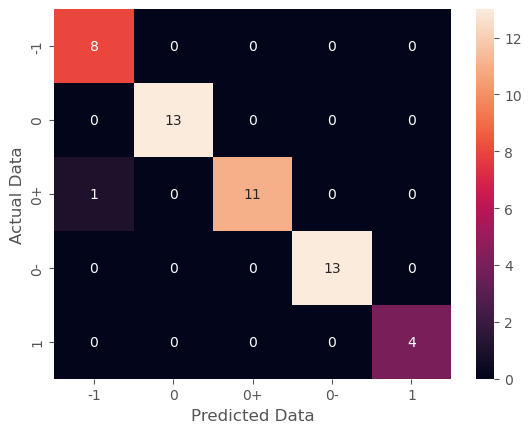

In [464]:
confusion_score = confusion_matrix(y_test, model.predict(x_test))
sns.heatmap(confusion_score, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel("Actual Data")
plt.xlabel("Predicted Data")
plt.show()

3. Support Vector Machine

In [373]:
from sklearn.svm import SVC
support_vector_classifier = SVC()
support_vector_classifier.fit(x_train, y_train)
print(f"AI Gen SET Index Sentiment Support Vector Machine Accuracy: {support_vector_classifier.score(x_test, y_test)*100:2f}%")

AI Gen SET Index Sentiment Support Vector Machine Accuracy: 100.000000%


4. Random Forest CLassifier

In [374]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
print(f"AI Gen SET Index Sentiment Random Forest Classifier Accuracy: {randomforest.score(x_test, y_test)*100:2f}%")

AI Gen SET Index Sentiment Random Forest Classifier Accuracy: 100.000000%


# Testing with random words

In [430]:
#testing

test = "แย่มากและไม่คาดฝัน" 
test = tfidf.transform([test])
prediction = model_twenteight.predict(test)

if prediction[0]==1:
    print("Positive") 
if prediction[0]==+0:
    print("Slightly Positive")
if prediction[0]==0:
    print("Neutral")
if prediction[0]==-0:
    print("Slightly Negative")
else:    
    print("Negative")

Negative


- Prediction works!! the "แย่มากและไม่คาดฝัน" word means 'terrible and unexpected'. 
- The above condition may further be improvised

Thank you!

Navid Bin Ahmed, 12-Jan 2022, 7:34 PM Bangladesh Time